In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import CustomRFECV
from src import plotting
from src.utils import select_N_one_standard_error

# Load results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection_update/linear_reg/rfecvS'
proc = GatherFeatureDatasets(is_p=False)

In [3]:
feature_names = proc.get_feature_names(18, 'dist', linear_model=True)
feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_sine'], dtype='<U33')

In [4]:
feature_plot_names = proc.get_feature_plot_names(18, 'dist')
feature_plot_names

array(['ratio 1', 'ratio 2', 'ratio 3', 'ratio 4', 'ratio 5', 'ratio 6',
       'ratio 7', 'ratio 8', 'ratio 9', 'ratio 10', 'ratio 11',
       'ratio 12', 'ratio 13', 'ratio 14', 'ratio 15', 'ratio 16',
       'ratio 17', 'ratio 18', 'amp. 1', 'amp. 2', 'amp. 3', 'amp. 4',
       'amp. 5', 'amp. 6', 'amp. 7', 'amp. 8', 'amp. 9', 'amp. 10',
       'amp. 11', 'amp. 12', 'amp. 13', 'amp. 14', 'amp. 15', 'amp. 16',
       'amp. 17', 'amp. 18', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'distance', 'back az.'], dtype='<U15')

In [5]:
with open(os.path.join(datadir, 'all.LR.DT.rel.rfecv.json')) as fp:
    rfecv_results_dict = json.load(fp)

In [6]:
with open(os.path.join(datadir, 'all.LR.DT.rel.rfe.full.json')) as fp:
    full_rfe_results_dict = json.load(fp)

# Results summary

In [7]:
plotting.set_default_fontsizes()

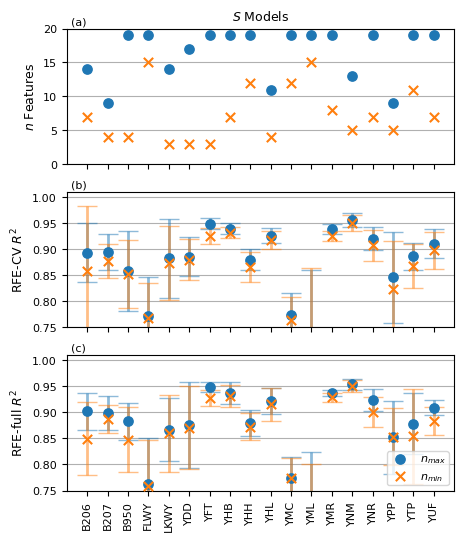

In [33]:
plotting.plot_rfecv_score_summary(rfecv_results_dict, 
                                    full_rfe_results_dict,
                                    capsize=7,
                                    score_ylims=[0.75, 1.01],
                                    grids=True,
                                    elinewidth=2,
                                    s=45,
                                    plot_N=True,
                                    N_ylims=[0, 20],
                                    figsize=(5, 6),
                                    # savefigname='../figures/RFE_summary_S.png',
                                    title='$\it{S}$ Models')

# RFECV Results - Best *N*

# 

In [9]:
# Save without filtering out zero rows
best_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_rfecv_important_feature_counts,
                                          filter_zeros=False)
best_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.best.csv'))

best_feat_cnts_df = best_feat_cnts_df.loc[~(best_feat_cnts_df==0).all(axis=1)]

In [10]:
best_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(best_feat_cnts_df)
best_feat_summary_df

,Feature,cnt
37,distance,180
36,depth,161
38,back az.,148
19,amp. 2,144
21,amp. 4,143
35,noise var.,138
34,sig. var.,126
31,sig. dom. amp.,124
30,sig. dom. freq.,123
32,noise max. amp.,120


In [11]:
best_feat_summary_df['rank'] = np.arange(best_feat_summary_df.shape[0])
best_feat_summary_df

,Feature,cnt,rank
37,distance,180,0
36,depth,161,1
38,back az.,148,2
19,amp. 2,144,3
21,amp. 4,143,4
35,noise var.,138,5
34,sig. var.,126,6
31,sig. dom. amp.,124,7
30,sig. dom. freq.,123,8
32,noise max. amp.,120,9


In [12]:
best_feat_summary_df[best_feat_summary_df.cnt > best_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
37,distance,180,0
36,depth,161,1
38,back az.,148,2
19,amp. 2,144,3
21,amp. 4,143,4
35,noise var.,138,5
34,sig. var.,126,6
31,sig. dom. amp.,124,7
30,sig. dom. freq.,123,8
32,noise max. amp.,120,9


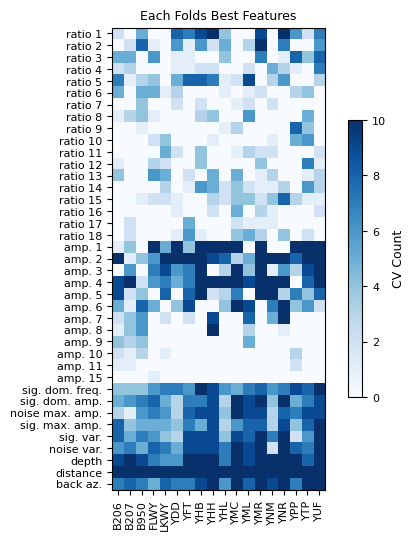

In [13]:
plotting.plot_rfecv_feature_heatmap(best_feat_cnts_df,
                                    figsize=(6, 6),
                                    title='Each Folds Best Features')

# RFECV Results 1 St. Error *N*

In [14]:
# Save without filtering out zero rows
oste_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                      feature_plot_names,
                      CustomRFECV.get_rfecv_important_feature_counts,
                      oste_feats=True,
                      filter_zeros=False)
oste_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.oste.csv'))
oste_feat_cnts_df = oste_feat_cnts_df.loc[~(oste_feat_cnts_df==0).all(axis=1)]

In [15]:
oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(oste_feat_cnts_df)
oste_feat_summary_df

,Feature,cnt
36,distance,165
18,amp. 2,111
20,amp. 4,109
17,amp. 1,97
19,amp. 3,77
35,depth,73
21,amp. 5,58
33,sig. var.,54
22,amp. 6,50
34,noise var.,50


In [16]:
oste_feat_summary_df['rank'] = np.arange(oste_feat_summary_df.shape[0])
oste_feat_summary_df

,Feature,cnt,rank
36,distance,165,0
18,amp. 2,111,1
20,amp. 4,109,2
17,amp. 1,97,3
19,amp. 3,77,4
35,depth,73,5
21,amp. 5,58,6
33,sig. var.,54,7
22,amp. 6,50,8
34,noise var.,50,9


In [17]:
oste_feat_summary_df[oste_feat_summary_df.cnt > oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
36,distance,165,0
18,amp. 2,111,1
20,amp. 4,109,2
17,amp. 1,97,3
19,amp. 3,77,4
35,depth,73,5
21,amp. 5,58,6
33,sig. var.,54,7
22,amp. 6,50,8
34,noise var.,50,9


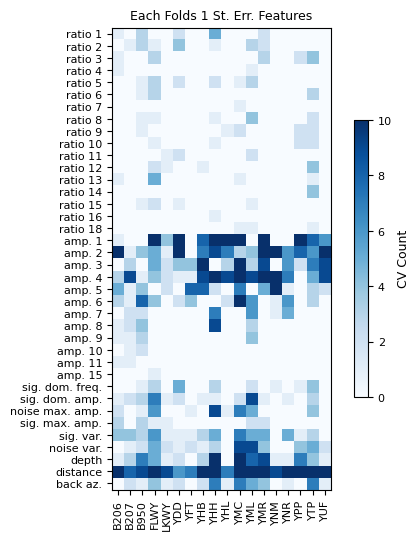

In [18]:
plotting.plot_rfecv_feature_heatmap(oste_feat_cnts_df,
                                    figsize=(6, 6),
                                    title='Each Folds 1 St. Err. Features')

# Best *N* Selected Features from Full Training Sets

In [19]:
selected_best_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          filter_zeros=False)
selected_best_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.best.csv'))
selected_best_features_df = selected_best_features_df.loc[~(selected_best_features_df==0).all(axis=1)]

In [20]:
sel_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_best_features_df)
sel_feat_summary_df

,Feature,cnt
35,distance,18
34,depth,18
36,back az.,17
21,amp. 4,16
19,amp. 2,15
33,noise var.,15
32,sig. var.,15
28,sig. dom. freq.,14
29,sig. dom. amp.,14
30,noise max. amp.,14


In [21]:
sel_feat_summary_df['rank'] = np.arange(sel_feat_summary_df.shape[0])
sel_feat_summary_df

,Feature,cnt,rank
35,distance,18,0
34,depth,18,1
36,back az.,17,2
21,amp. 4,16,3
19,amp. 2,15,4
33,noise var.,15,5
32,sig. var.,15,6
28,sig. dom. freq.,14,7
29,sig. dom. amp.,14,8
30,noise max. amp.,14,9


In [22]:
sel_feat_summary_df[sel_feat_summary_df.cnt > sel_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
35,distance,18,0
34,depth,18,1
36,back az.,17,2
21,amp. 4,16,3
19,amp. 2,15,4
33,noise var.,15,5
32,sig. var.,15,6


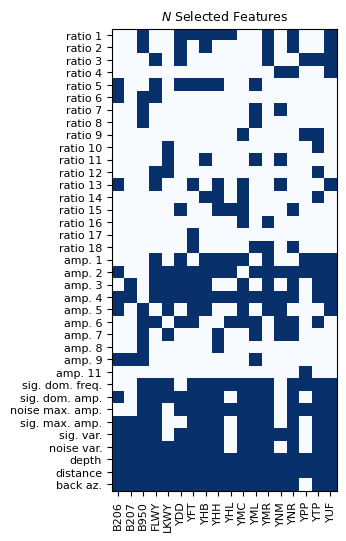

In [23]:
plotting.plot_rfecv_feature_heatmap(selected_best_features_df, 
                                    plot_colorbar=False,
                                    figsize=(5, 6),
                                    title='$\it{N}$ Selected Features')

# 1 St. Err. *N* Selected Features from Full Training Sets

In [24]:
selected_oste_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          oste_feats=True,
                                          filter_zeros=False)
selected_oste_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.oste.csv'))
selected_oste_features_df = selected_oste_features_df.loc[~(selected_oste_features_df==0).all(axis=1)]                                         

In [25]:
sel_oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_oste_features_df)
sel_oste_feat_summary_df

,Feature,cnt
24,distance,18
11,amp. 4,13
9,amp. 2,12
8,amp. 1,10
23,depth,9
21,sig. var.,9
10,amp. 3,8
12,amp. 5,7
22,noise var.,6
18,sig. dom. amp.,5


In [26]:
sel_oste_feat_summary_df['rank'] = np.arange(sel_oste_feat_summary_df.shape[0])
sel_oste_feat_summary_df

,Feature,cnt,rank
24,distance,18,0
11,amp. 4,13,1
9,amp. 2,12,2
8,amp. 1,10,3
23,depth,9,4
21,sig. var.,9,5
10,amp. 3,8,6
12,amp. 5,7,7
22,noise var.,6,8
18,sig. dom. amp.,5,9


In [27]:
sel_oste_feat_summary_df[sel_oste_feat_summary_df.cnt > sel_oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
24,distance,18,0
11,amp. 4,13,1
9,amp. 2,12,2
8,amp. 1,10,3
23,depth,9,4
21,sig. var.,9,5
10,amp. 3,8,6


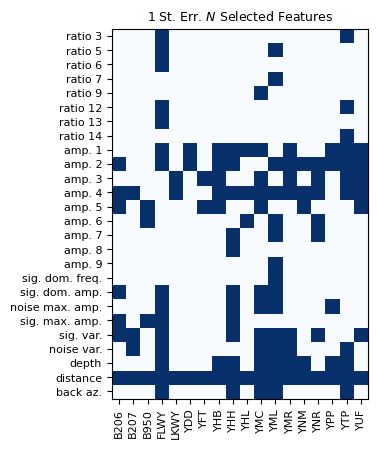

In [28]:
plotting.plot_rfecv_feature_heatmap(selected_oste_features_df, 
                                    plot_colorbar=False,
                                    title='1 St. Err. $\it{N}$ Selected Features')

In [29]:
sum_merge=best_feat_summary_df.merge(oste_feat_summary_df, on='Feature', suffixes=('_kbest', '_kmin'), how='outer') \
                    .merge(sel_feat_summary_df, on="Feature", how='outer') \
                    .merge(sel_oste_feat_summary_df, on='Feature', suffixes=('_best', '_min'), how='outer')

In [30]:
sum_merge[['Feature', 'rank_kbest',  'rank_kmin',
                    'rank_best', 'rank_min', 'cnt_kbest',
                      'cnt_kmin', 'cnt_best','cnt_min']].sort_values('rank_best')

,Feature,rank_kbest,rank_kmin,rank_best,rank_min,cnt_kbest,cnt_kmin,cnt_best,cnt_min
0,distance,0,0.0,0.0,0.0,180,165.0,18.0,18.0
1,depth,1,5.0,1.0,4.0,161,73.0,18.0,9.0
2,back az.,2,10.0,2.0,10.0,148,45.0,17.0,5.0
4,amp. 4,4,2.0,3.0,1.0,143,109.0,16.0,13.0
3,amp. 2,3,1.0,4.0,2.0,144,111.0,15.0,12.0
5,noise var.,5,9.0,5.0,8.0,138,50.0,15.0,6.0
6,sig. var.,6,7.0,6.0,5.0,126,54.0,15.0,9.0
8,sig. dom. freq.,8,14.0,7.0,23.0,123,20.0,14.0,1.0
7,sig. dom. amp.,7,12.0,8.0,9.0,124,34.0,14.0,5.0
9,noise max. amp.,9,11.0,9.0,11.0,120,36.0,14.0,5.0


In [31]:
sum_merge[(sum_merge.rank_best.isin(range(6))) | (sum_merge.rank_min.isin(range(6)))][['Feature', 'rank_best', 'rank_min']].sort_values('rank_best')

,Feature,rank_best,rank_min
0,distance,0.0,0.0
1,depth,1.0,4.0
2,back az.,2.0,10.0
4,amp. 4,3.0,1.0
3,amp. 2,4.0,2.0
5,noise var.,5.0,8.0
6,sig. var.,6.0,5.0
10,amp. 1,12.0,3.0
